# Ex1 ML Andrew Ng

### Warm Up

In [48]:
import numpy as np
def warm_up_excercise():
    return np.identity(5)

In [8]:
warm_up_excercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Load Data

In [44]:
import pandas as pd
df = pd.read_csv('ex1data1.txt', header=None, names = ["Population of a City (10k)", "Profit of City Food Truck ($10k)"])

In [45]:
df.describe() # ensure data loaded properly

,Population of a City (10k),Profit of City Food Truck ($10k)
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Plot Data

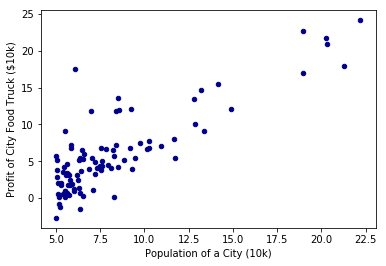

In [33]:
# How to plot: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.scatter.html
import matplotlib.pyplot
df.plot.scatter(x='Population of a City (10k)',y='Profit of City Food Truck ($10k)', c='DarkBlue');

### Compute the cost of a particular choice of theta

In [113]:
def compute_cost_given(X, y, theta):
    theta_0_vector = np.full((X.size), theta[0])
    theta_1_vector = np.full((X.size), theta[1])
    return np.sum((theta_0_vector + theta_1_vector*X - y)**2) / (2*X.size)

In [114]:
# TEST compute_cost_given
X = np.full((5), 2)
y = np.full((5), 0)
assert compute_cost_given(X, y, [1, 2]) == 12
X = df.values[:, 0]
y = df.values[:, 1]
assert compute_cost_given(X, y, [0, 0]) == 32.072733877455676

### Minimize the cost function

In [143]:
def gradient_descent(X, y, theta, alpha, num_iters):
    for _ in range(num_iters):
        theta_0_vector = np.full((X.size), theta[0])
        theta_1_vector = np.full((X.size), theta[1])
        # NOTE THETA IS A SCALAR!!! We just make it into a vector for ease of calculation
        theta_0_prime = theta[0] - update_theta_0(X, y, theta_0_vector, theta_1_vector, alpha)
        theta_1_prime = theta[1] - update_theta_1(X, y, theta_0_vector, theta_1_vector, alpha)
        theta = [theta_0_prime, theta_1_prime]
        # print compute_cost_given(X, y, theta)
    return theta

def update_theta_0(X, y, theta_0_vector, theta_1_vector, alpha):
    return np.sum(theta_0_vector + theta_1_vector*X - y)*alpha/X.size

def update_theta_1(X, y, theta_0_vector, theta_1_vector, alpha):
    return np.sum((theta_0_vector + theta_1_vector*X - y)*X)*alpha/X.size

In [183]:
alpha = 0.01
iterations = 1500
theta = [0, 0]
assert compute_cost_given(X, y, theta) == 32.072733877455676
theta = gradient_descent(X, y, theta, alpha, iterations)
assert compute_cost_given(X, y, theta) == 4.483388256587726

### Plot linear regressions on data

In [ ]:
# Plot data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

plt.scatter(X, y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of a City (10k)')
plt.ylabel('Profit of City Food Truck ($10k)');

# Plot gradient descent
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx
plt.plot(xx,yy, label='Linear regression (Hand written gradient descent)')

# Compare with Scikit-learn Linear regression 
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
# X.reshape(-1,1) IS Change [1, 2, 3, 4, 5] ----> [[1], [2], [3], [4]]
linear_regression.fit(X.reshape(-1,1), y)
yy_skikit = linear_regression.intercept_+linear_regression.coef_*xx
plt.plot(xx, yy_skikit, label='Linear regression (Scik skit skit skit learn)')

plt.legend(loc=4);

## Plot contour plots

In [184]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

NameError: name 'computeCost' is not defined